In [7]:
import pandas as pd
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

In [12]:
ds_dir = Path('/mnt/sda1/Summarization/SurgSum/SummarizationDataset/annotation')
dirs = list(ds_dir.glob('*txt'))

In [15]:
file_name = dirs[0].stem

In [16]:
print(f'{file_name} start')

df = pd.read_table(dirs[0],comment='#')
df.rename(columns={'開始時間 - 秒.ミリ秒':'start','終了時間 - 秒.ミリ秒':'end'},inplace=True)

num_flames = int(df['end'].max() * 30 // 1)
dic = {'Frame':[i for i in range(num_flames)], 'time':[0]*num_flames, 'field':[0]*num_flames,
'phase':['others']*num_flames,'summary':[0]*num_flames}

video03 start


video05: ~1:10:00

In [17]:
df_sf = df[df['Surgical Field'].notnull()]
df_phase = df[df['Phase'].notnull()]
df_sum = df[df['Summary'].notnull()]

In [18]:
for i in range(num_flames):
    dic['time'][i] = str(datetime.timedelta(seconds=i/30))[:10]
for i in range(len(df_sf)):
    start_frame = int(df_sf['start'].iloc[i] * 30)
    end_frame = int(df_sf['end'].iloc[i] * 30)

    for j in range(start_frame,end_frame):
        dic['field'][j] = df_sf['Surgical Field'].iloc[i]
        
for i in range(len(df_phase)):
    start_frame = int(df_phase['start'].iloc[i] * 30)
    end_frame = int(df_phase['end'].iloc[i] * 30)

    for j in range(start_frame,end_frame):
        dic['phase'][j] = df_phase['Phase'].iloc[i]
        
for i in range(len(df_sum)):
    start_frame = int(df_sum['start'].iloc[i] * 30)
    end_frame = int(df_sum['end'].iloc[i] * 30)

    for j in range(start_frame,end_frame):
        dic['summary'][j] = df_sum['Summary'].iloc[i]
        
data = pd.DataFrame(dic)
data['time'] = data['time'].map(lambda x: x if len(x) == 10 else x + '.00')
data.loc[data[data.field==False].index,['phase']] = 'irrelevant'

In [19]:
data.head()

,Frame,time,field,phase,summary
0,0,0:00:00.00,True,others,-1.0
1,1,0:00:00.03,True,others,-1.0
2,2,0:00:00.06,True,others,-1.0
3,3,0:00:00.10,True,others,-1.0
4,4,0:00:00.13,True,others,-1.0


In [85]:
data[data.phase!='irrelevant'].phase.value_counts()

dissection    16831
hemostasis    11313
others         9695
incision       3084
closure        2883
anesthesia     2514
design          487
Name: phase, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2779c56730>,
 [Text(-0.9991588771017446, -0.4600886200600716, 'dissection'),
  Text(0.7495646646679277, -0.8050793833413307, 'hemostasis'),
  Text(0.9146932350929589, 0.6110125086077841, 'others'),
  Text(0.13623860837018076, 1.0915305958100106, 'incision'),
  Text(-0.30009988677279076, 1.0582722040944657, 'closure'),
  Text(-0.655641057730299, 0.8832524007430124, 'anesthesia'),
  Text(-0.8190913248271521, 0.7342270776761786, 'design')],
 [Text(-0.5449957511464061, -0.2509574291236754, '36.0%'),
  Text(0.4088534534552332, -0.43913420909527123, '24.2%'),
  Text(0.4989235827779775, 0.3332795501497004, '20.7%'),
  Text(0.07431196820191677, 0.5953803249872784, '6.6%'),
  Text(-0.16369084733061312, 0.5772393840515266, '6.2%'),
  Text(-0.3576223951256176, 0.4817740367689157, '5.4%'),
  Text(-0.44677708626935564, 0.40048749691427915, '1.0%')])

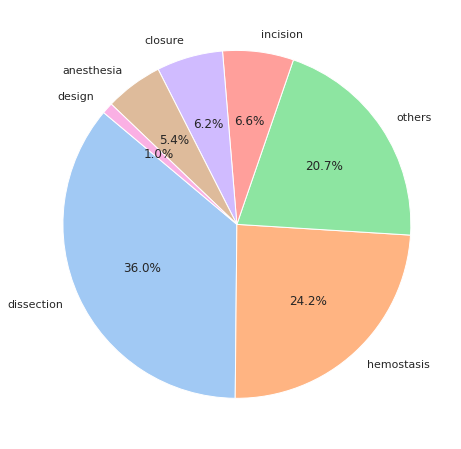

In [86]:
dic = data[data.phase!='irrelevant'].phase.value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(dic.values, labels=dic.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

In [87]:
data.field.value_counts()

True     46807
False    10256
Name: field, dtype: int64

In [88]:
data.summary.value_counts()

 0.0    27425
-1.0    14963
 1.0    14675
Name: summary, dtype: int64

In [89]:
import numpy as np
from tqdm.notebook import tqdm

In [90]:
labels = data[data.index%150 == 0][data.field == True].reset_index().summary[:100]

<ipython-input-90-b6d7471d7cbf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  labels = data[data.index%150 == 0][data.field == True].reset_index().summary[:100]


In [91]:
labels.shape

(100,)

In [92]:
data[data.index%30 == 0][data.field == True].summary.unique()

<ipython-input-92-0525ab463f95>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.index%30 == 0][data.field == True].summary.unique()


array([ 0., -1.,  1.])

In [96]:
action_list = data[data.index%30 == 0][data.field == True].reset_index().summary.values + 1
image_height = 100

<ipython-input-96-be0ef9f68362>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  action_list = data[data.index%30 == 0][data.field == True].reset_index().summary.values + 1


In [97]:
from PIL import Image
# convert to 2D array.
array = np.array(action_list, dtype=np.uint8)
array = np.tile(array, reps=(image_height, 1))

# convert to an image using color palette.
image = Image.fromarray(array)
image = image.convert("P")
image.putpalette([0,0,255,255,255,255,255,0,0])

In [99]:
action_list = data[data.index%30 == 0][data.field == True].reset_index().phase.values 
image_height = 100

<ipython-input-99-a82153b0c968>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  action_list = data[data.index%30 == 0][data.field == True].reset_index().phase.values


In [104]:
data.phase.unique()

array(['others', 'irrelevant', 'design', 'anesthesia', 'hemostasis',
       'incision', 'dissection', 'closure'], dtype=object)

In [100]:
from PIL import Image
# convert to 2D array.
array = np.array(action_list, dtype=np.uint8)
array = np.tile(array, reps=(image_height, 1))

# convert to an image using color palette.
image = Image.fromarray(array)
image = image.convert("P")
image.putpalette(pallete)

ValueError: invalid literal for int() with base 10: 'others'

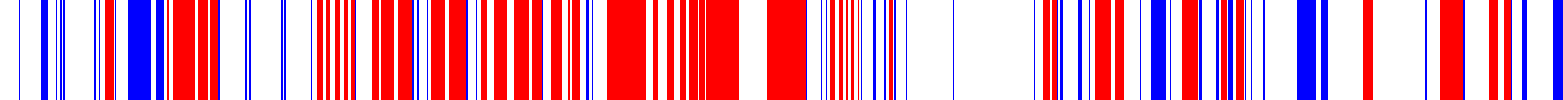

In [98]:
image

In [32]:
"""
This color palette is obtained from pascal voc.
To obtain this, please run the below code.

```python
from PIL import Image


img = Image.open(<PATH TO LABEL IMAGE OF PASCAL VOC>)
img = img.convert("P")
palette = img.getpalette()
"""

palette = [
    0,
    0,
    0,
    128,
    0,
    0,
    0,
    128,
    0,
    128,
    128,
    0,
    0,
    0,
    128,
    128,
    0,
    128,
    0,
    128,
    128,
    128,
    128,
    128,
    64,
    0,
    0,
    192,
    0,
    0,
    64,
    128,
    0,
    192,
    128,
    0,
    64,
    0,
    128,
    192,
    0,
    128,
    64,
    128,
    128,
    192,
    128,
    128,
    0,
    64,
    0,
    128,
    64,
    0,
    0,
    192,
    0,
    128,
    192,
    0,
    0,
    64,
    128,
    128,
    64,
    128,
    0,
    192,
    128,
    128,
    192,
    128,
    64,
    64,
    0,
    192,
    64,
    0,
    64,
    192,
    0,
    192,
    192,
    0,
    64,
    64,
    128,
    192,
    64,
    128,
    64,
    192,
    128,
    192,
    192,
    128,
    0,
    0,
    64,
    128,
    0,
    64,
    0,
    128,
    64,
    128,
    128,
    64,
    0,
    0,
    192,
    128,
    0,
    192,
    0,
    128,
    192,
    128,
    128,
    192,
    64,
    0,
    64,
    192,
    0,
    64,
    64,
    128,
    64,
    192,
    128,
    64,
    64,
    0,
    192,
    192,
    0,
    192,
    64,
    128,
    192,
    192,
    128,
    192,
    0,
    64,
    64,
    128,
    64,
    64,
    0,
    192,
    64,
    128,
    192,
    64,
    0,
    64,
    192,
    128,
    64,
    192,
    0,
    192,
    192,
    128,
    192,
    192,
    64,
    64,
    64,
    192,
    64,
    64,
    64,
    192,
    64,
    192,
    192,
    64,
    64,
    64,
    192,
    192,
    64,
    192,
    64,
    192,
    192,
    192,
    192,
    192,
    32,
    0,
    0,
    160,
    0,
    0,
    32,
    128,
    0,
    160,
    128,
    0,
    32,
    0,
    128,
    160,
    0,
    128,
    32,
    128,
    128,
    160,
    128,
    128,
    96,
    0,
    0,
    224,
    0,
    0,
    96,
    128,
    0,
    224,
    128,
    0,
    96,
    0,
    128,
    224,
    0,
    128,
    96,
    128,
    128,
    224,
    128,
    128,
    32,
    64,
    0,
    160,
    64,
    0,
    32,
    192,
    0,
    160,
    192,
    0,
    32,
    64,
    128,
    160,
    64,
    128,
    32,
    192,
    128,
    160,
    192,
    128,
    96,
    64,
    0,
    224,
    64,
    0,
    96,
    192,
    0,
    224,
    192,
    0,
    96,
    64,
    128,
    224,
    64,
    128,
    96,
    192,
    128,
    224,
    192,
    128,
    32,
    0,
    64,
    160,
    0,
    64,
    32,
    128,
    64,
    160,
    128,
    64,
    32,
    0,
    192,
    160,
    0,
    192,
    32,
    128,
    192,
    160,
    128,
    192,
    96,
    0,
    64,
    224,
    0,
    64,
    96,
    128,
    64,
    224,
    128,
    64,
    96,
    0,
    192,
    224,
    0,
    192,
    96,
    128,
    192,
    224,
    128,
    192,
    32,
    64,
    64,
    160,
    64,
    64,
    32,
    192,
    64,
    160,
    192,
    64,
    32,
    64,
    192,
    160,
    64,
    192,
    32,
    192,
    192,
    160,
    192,
    192,
    96,
    64,
    64,
    224,
    64,
    64,
    96,
    192,
    64,
    224,
    192,
    64,
    96,
    64,
    192,
    224,
    64,
    192,
    96,
    192,
    192,
    224,
    192,
    192,
    0,
    32,
    0,
    128,
    32,
    0,
    0,
    160,
    0,
    128,
    160,
    0,
    0,
    32,
    128,
    128,
    32,
    128,
    0,
    160,
    128,
    128,
    160,
    128,
    64,
    32,
    0,
    192,
    32,
    0,
    64,
    160,
    0,
    192,
    160,
    0,
    64,
    32,
    128,
    192,
    32,
    128,
    64,
    160,
    128,
    192,
    160,
    128,
    0,
    96,
    0,
    128,
    96,
    0,
    0,
    224,
    0,
    128,
    224,
    0,
    0,
    96,
    128,
    128,
    96,
    128,
    0,
    224,
    128,
    128,
    224,
    128,
    64,
    96,
    0,
    192,
    96,
    0,
    64,
    224,
    0,
    192,
    224,
    0,
    64,
    96,
    128,
    192,
    96,
    128,
    64,
    224,
    128,
    192,
    224,
    128,
    0,
    32,
    64,
    128,
    32,
    64,
    0,
    160,
    64,
    128,
    160,
    64,
    0,
    32,
    192,
    128,
    32,
    192,
    0,
    160,
    192,
    128,
    160,
    192,
    64,
    32,
    64,
    192,
    32,
    64,
    64,
    160,
    64,
    192,
    160,
    64,
    64,
    32,
    192,
    192,
    32,
    192,
    64,
    160,
    192,
    192,
    160,
    192,
    0,
    96,
    64,
    128,
    96,
    64,
    0,
    224,
    64,
    128,
    224,
    64,
    0,
    96,
    192,
    128,
    96,
    192,
    0,
    224,
    192,
    128,
    224,
    192,
    64,
    96,
    64,
    192,
    96,
    64,
    64,
    224,
    64,
    192,
    224,
    64,
    64,
    96,
    192,
    192,
    96,
    192,
    64,
    224,
    192,
    192,
    224,
    192,
    32,
    32,
    0,
    160,
    32,
    0,
    32,
    160,
    0,
    160,
    160,
    0,
    32,
    32,
    128,
    160,
    32,
    128,
    32,
    160,
    128,
    160,
    160,
    128,
    96,
    32,
    0,
    224,
    32,
    0,
    96,
    160,
    0,
    224,
    160,
    0,
    96,
    32,
    128,
    224,
    32,
    128,
    96,
    160,
    128,
    224,
    160,
    128,
    32,
    96,
    0,
    160,
    96,
    0,
    32,
    224,
    0,
    160,
    224,
    0,
    32,
    96,
    128,
    160,
    96,
    128,
    32,
    224,
    128,
    160,
    224,
    128,
    96,
    96,
    0,
    224,
    96,
    0,
    96,
    224,
    0,
    224,
    224,
    0,
    96,
    96,
    128,
    224,
    96,
    128,
    96,
    224,
    128,
    224,
    224,
    128,
    32,
    32,
    64,
    160,
    32,
    64,
    32,
    160,
    64,
    160,
    160,
    64,
    32,
    32,
    192,
    160,
    32,
    192,
    32,
    160,
    192,
    160,
    160,
    192,
    96,
    32,
    64,
    224,
    32,
    64,
    96,
    160,
    64,
    224,
    160,
    64,
    96,
    32,
    192,
    224,
    32,
    192,
    96,
    160,
    192,
    224,
    160,
    192,
    32,
    96,
    64,
    160,
    96,
    64,
    32,
    224,
    64,
    160,
    224,
    64,
    32,
    96,
    192,
    160,
    96,
    192,
    32,
    224,
    192,
    160,
    224,
    192,
    96,
    96,
    64,
    224,
    96,
    64,
    96,
    224,
    64,
    224,
    224,
    64,
    96,
    96,
    192,
    224,
    96,
    192,
    96,
    224,
    192,
    224,
    224,
    192,
]

In [20]:
pd.read_csv("/mnt/sda1/Summarization/SurgSum/SummarizationDataset/csv/video00.csv")

,Frame,time,field,phase,summary
0,0,0:00:00.00,False,irrelevant,0.0
1,1,0:00:00.03,False,irrelevant,0.0
2,2,0:00:00.06,False,irrelevant,0.0
3,3,0:00:00.10,False,irrelevant,0.0
4,4,0:00:00.13,False,irrelevant,0.0
...,...,...,...,...,...
131835,131835,1:13:14.50,False,irrelevant,-1.0
131836,131836,1:13:14.53,False,irrelevant,-1.0
131837,131837,1:13:14.56,False,irrelevant,-1.0
131838,131838,1:13:14.60,False,irrelevant,-1.0
